In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
#importing required packages
import os
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import numpy as np
import math
import re
from datetime import datetime
import seaborn as sns

In [3]:
os.chdir('../')

In [4]:
os.getcwd()

'/Users/ksunil/Desktop/Karan/Codebase'

In [5]:
import src.Tide_API as tide
import src.Depth_profile as depth
import src.Coral_Reef as coral_reef
import src.ICESAT_plots as is2_plot
import src.IS2_file as is2File

In [6]:
data_dir = 'data'
reef_name = 'Moce'
gjson_path = os.path.join(data_dir, reef_name, '{reef}.geojson'.format(reef=reef_name))
reef = coral_reef.Coral_Reef(data_dir, reef_name)
coords = reef.get_bounding_box()
h5_dir = reef.get_path() + '/H5'

                                            geometry
0  POLYGON ((-178.5376060009003 -18.6365366345374...
                                            geometry
0  POLYGON ((-178.5376060009003 -18.6365366345374...


In [104]:
coords

(-178.53760600090027,
 -18.755206591925898,
 -178.4115636348724,
 -18.62375715561433)

In [14]:
h5_fn = 'ATL03_20181210123712_11130108_002_01.h5'
is2 = is2File.IS2_file(h5_dir,h5_fn,coords)

{'status': 'OK', 'message': '', 'countryCode': 'FJ', 'countryName': 'Fiji', 'zoneName': 'Pacific/Fiji', 'abbreviation': 'FJT', 'gmtOffset': 46800, 'dst': '1', 'zoneStart': 1541253600, 'zoneEnd': 1547301600, 'nextAbbreviation': 'FJT', 'timestamp': 1544492232, 'formatted': '2018-12-11 01:37:12'}


gt1r
Number of ICESAT-2 Photons in gt1r is 56128
Number of reef Photons in gt1r after cleaning is 8387


<IPython.core.display.Javascript object>


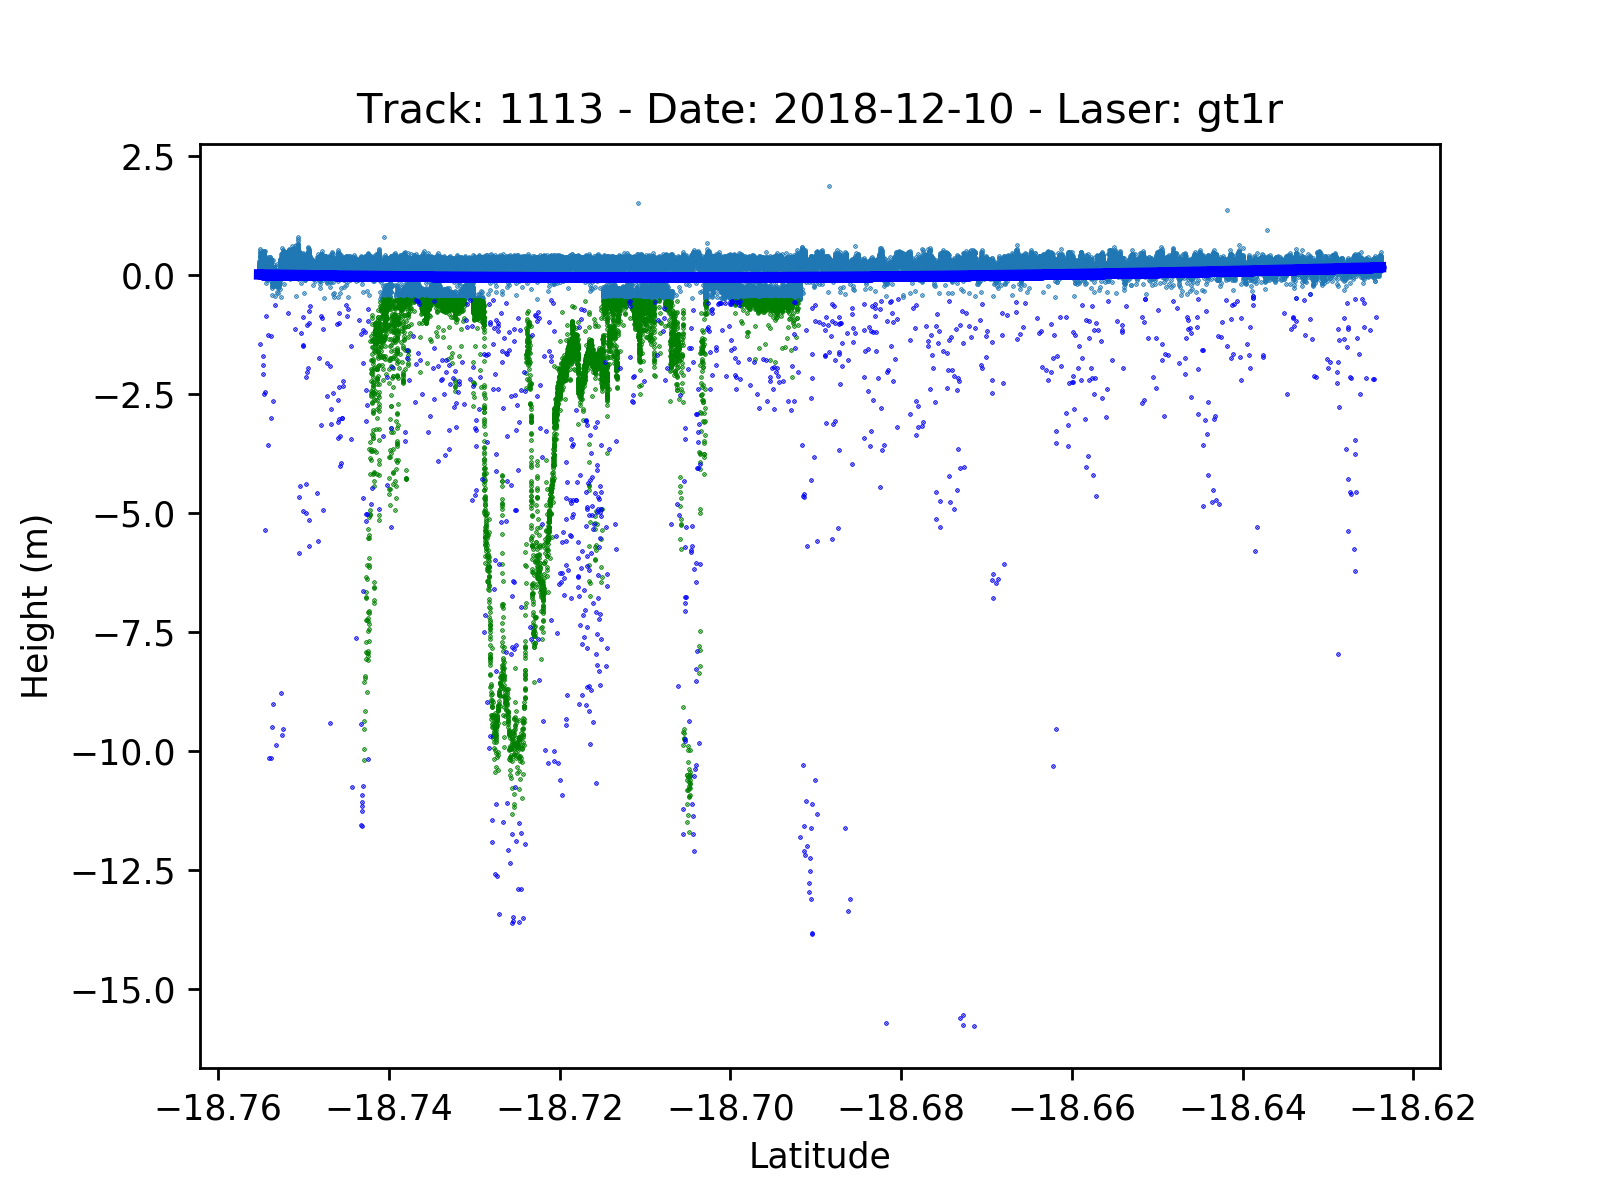

gt2r
Number of ICESAT-2 Photons in gt2r is 32072


/Users/ksunil/Desktop/Karan/Codebase/src/Depth_profile.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['x'], df['y'] = proj.transform(crs_wgs, crs_bng, df.Longitude.values, df.Latitude.values)
/Users/ksunil/Desktop/Karan/Codebase/src/Depth_profile.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['sea_level'] = sea


Number of reef Photons in gt2r after cleaning is 5093


<IPython.core.display.Javascript object>


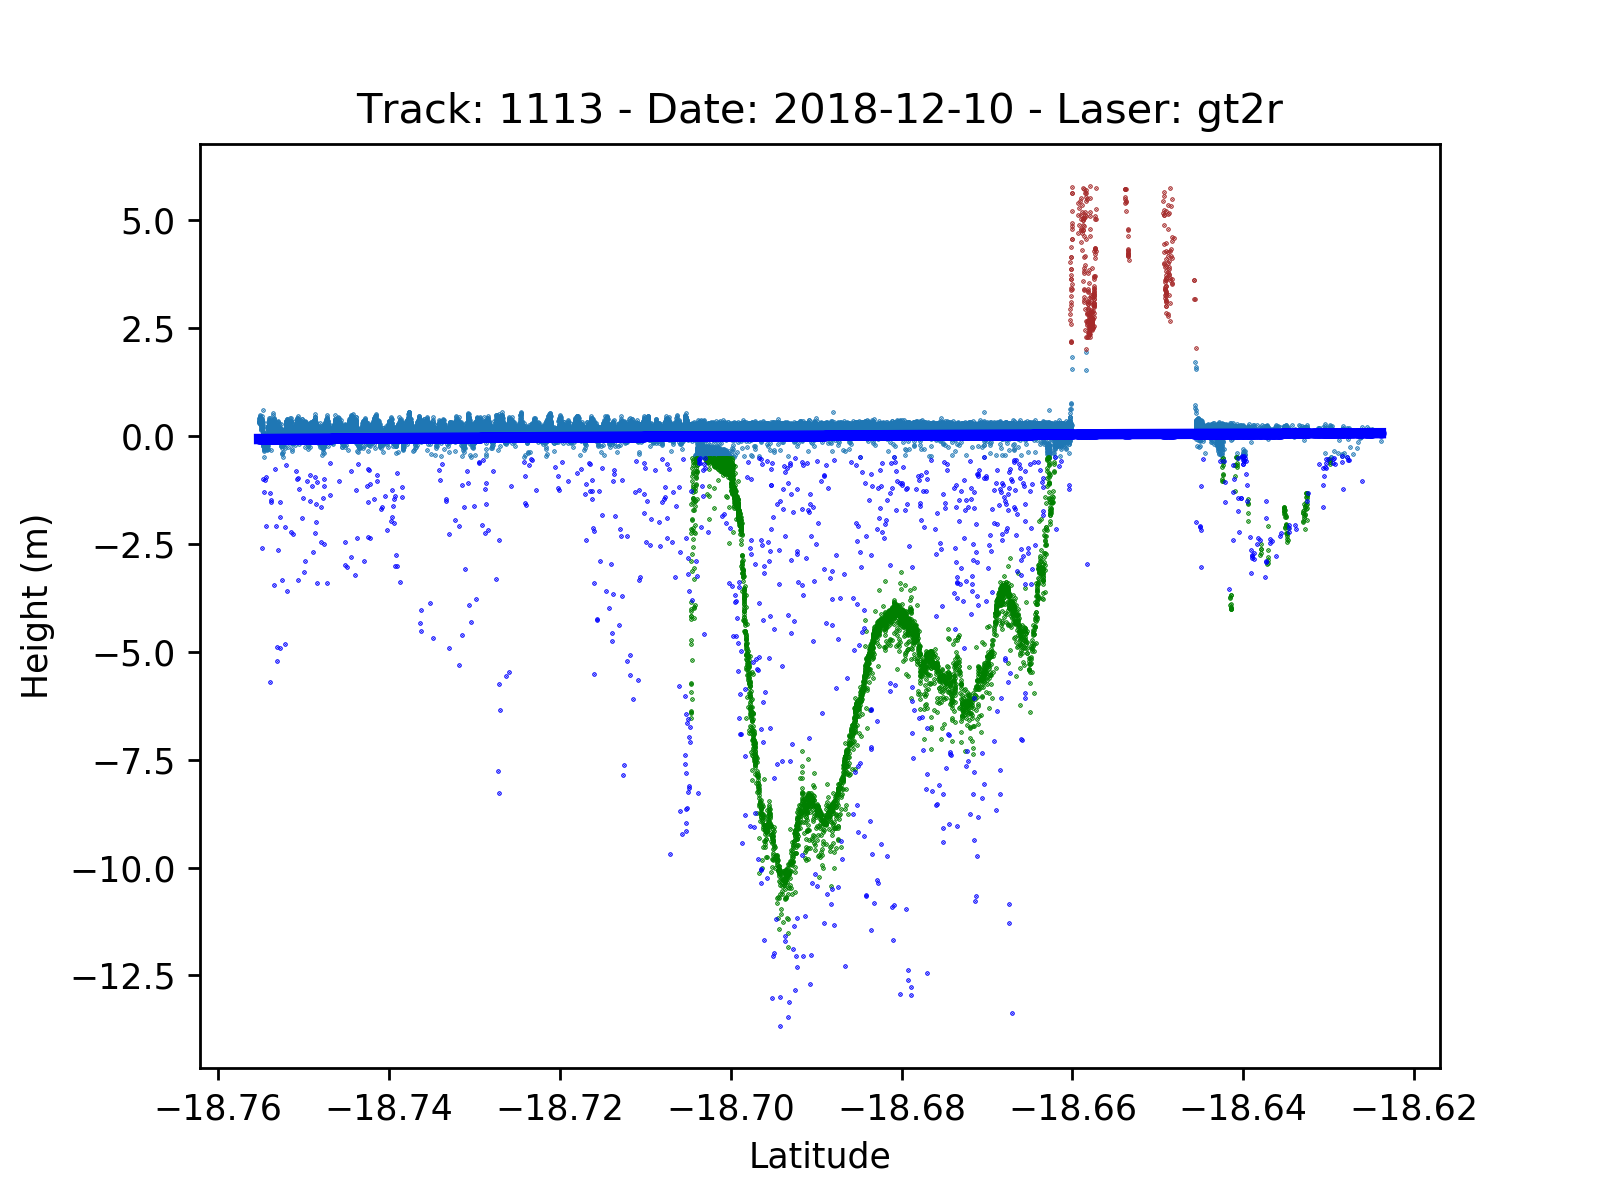

gt3r
Number of ICESAT-2 Photons in gt3r is 32377


/Users/ksunil/Desktop/Karan/Codebase/src/Depth_profile.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['x'], df['y'] = proj.transform(crs_wgs, crs_bng, df.Longitude.values, df.Latitude.values)
/Users/ksunil/Desktop/Karan/Codebase/src/Depth_profile.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['sea_level'] = sea


Number of reef Photons in gt3r after cleaning is 1860


<IPython.core.display.Javascript object>


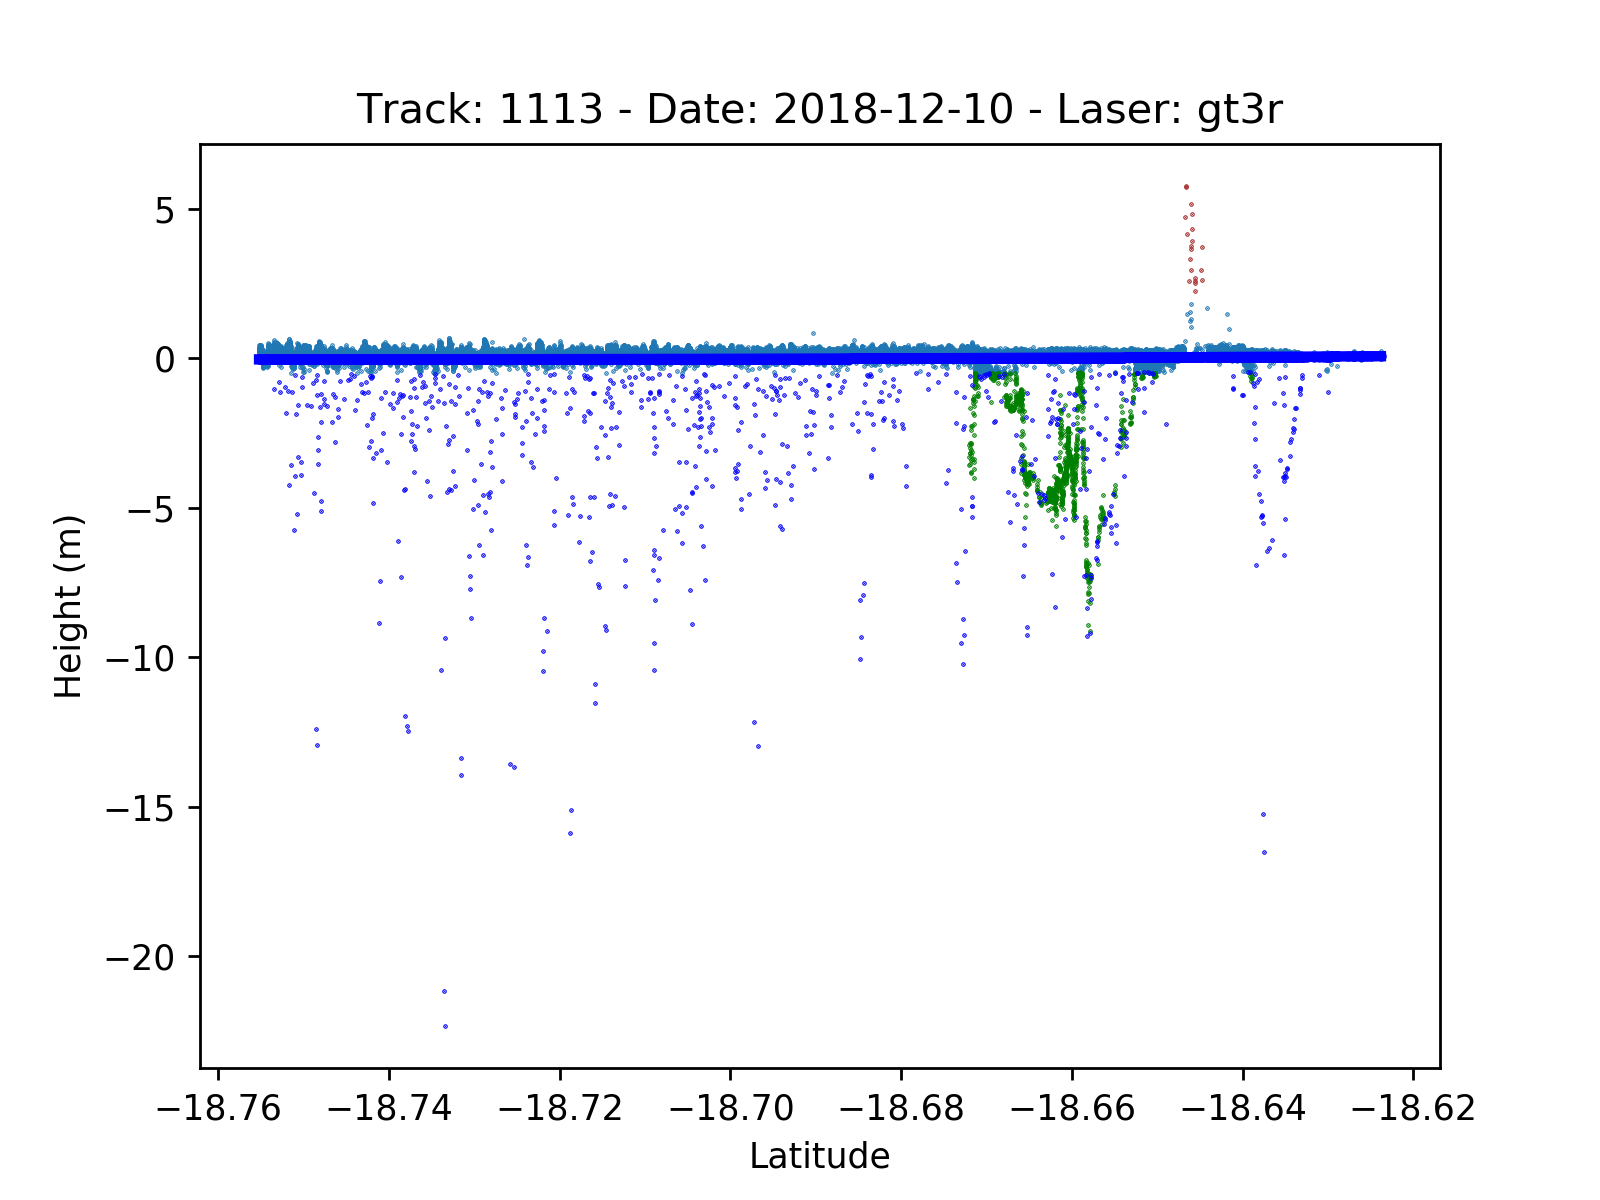

In [33]:
depth.process_h5(reef, is2)

In [9]:
import src.Tide_API as tide

In [10]:
from datetime import datetime

In [11]:
from datetime import timedelta

In [12]:
from sklearn.cluster import DBSCAN

In [13]:
photons.head()

NameError: name 'photons' is not defined

In [ ]:
import pyproj as proj



In [ ]:
def create_photon_df(photon_data):
    """
    Creates dataframe from photon data
    Params - 1. photon_data (list) - photon data extracted from h5 file
    Return - DataFrame - containing photon data
    """
    df = pd.DataFrame(photon_data).T
    #sets the column names
    df.columns = ['Height', 'Latitude', 'Longitude','Confidence']
    return df

In [ ]:
data_dir = 'data'
reef_name = 'Banco_Chinchorro'
gjson_path = os.path.join(data_dir, reef_name, '{reef}.geojson'.format(reef=reef_name))
reef = coral_reef.Coral_Reef(data_dir, reef_name)
coords = reef.get_bounding_box()
h5_dir = reef.get_path() + '/H5'

In [ ]:
for h5_fn in os.listdir(h5_dir):
    if h5_fn.endswith('.h5'):
        is2_file = is2File.IS2_file(h5_dir,h5_fn,coords)
        get_dp(reef,is2_file)
        break

In [89]:
def get_dp(reef, is2):
    icesat_fp, proc_fp, images_fp,data_plots_path = reef.get_file_drectories()
    is2_file_tag = is2.get_file_tag()
    for laser in is2.get_strong_lasers():
        photon_fn = '{reef_name}_photons_{h5_fn}_{laser}.csv'.format(reef_name=reef_name, h5_fn=is2_file_tag, laser=laser)
        photons_path = os.path.join(icesat_fp, photon_fn)
#         print(photons_path)
        try:
            photons = pd.read_csv(photons_path)
        except:
#             print(photons_path)
            continue
        # setup your projections
        crs_wgs = proj.Proj(init='epsg:4326') # assuming you're using WGS84 geographic
        crs_bng = proj.Proj(init='epsg:3857') # use a locally appropriate projected CRS

        # then cast your geographic coordinate pair to the projected system
        photons['x'], photons['y'] = proj.transform(crs_wgs, crs_bng, photons.Longitude.values, photons.Latitude.values)
        dbscan = DBSCAN(eps = 1, min_samples = 5)
        f = is2.get_sea_level_function(laser)
        sea = photons['Latitude'].apply(f)
        mean_sea = np.mean(sea)
        sea -= mean_sea
        photons['sea_level'] = sea
        tide = is2.get_tide()
        photons = photons.loc[photons.Height < photons.sea_level-0.5-tide]
        x = photons[['Height','x']]
        if len(x) == 0:
            continue
        model = dbscan.fit(x)
        labels = model.labels_
        photons['labels'] = labels
        reef_ph = photons.loc[photons.labels >= 0]
        if (len(reef_ph)) < 1000:
            continue
        noise = photons.loc[photons.labels == -1]
        fig,ax = plt.subplots()
        plt.scatter(reef_ph.Latitude, reef_ph.Height, s=0.1, color = 'green')
        plt.scatter(noise.Latitude, noise.Height, s= 0.1, color = 'blue')
    #     display(photons)
    #     break

In [90]:
h5_fn = 'ATL03_20181206154704_10540107_002_01.h5'

In [91]:
is2_file = is2File.IS2_file(h5_dir,h5_fn,coords)

OSError: Unable to open file (unable to open file: name = 'data/Banco_Chinchorro/H5/ATL03_20181206154704_10540107_002_01.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [262]:
print(coords)

(-221.96736574172974, 9.419681426390591, -221.78855895996094, 9.66000586709945)


'data/Moce/Data_Cleaning/Processed_output/Moce_ATL03_20181210123712_11130108_002_01_gt1r.csv'

In [94]:
train = pd.read_csv(os.path.join('data','Moce','Output','Data_Cleaning','Processed_output','Moce_ATL03_20181210123712_11130108_002_01_gt1r.csv'))

In [95]:
train.head()

,Unnamed: 0,Unnamed: 0.1,Height,Latitude,Longitude,Confidence,Conf_land,Conf_ocean,x,y,sea_level,labels
0,151,1617751,-0.890500,-18.624399,-178.459040,[ 4 1 -1 -1 4],4,1,-1.986597e+07,-2.110764e+06,0.175624,-1
1,192,1617797,-2.191749,-18.624571,-178.459058,[ 4 1 -1 -1 3],4,1,-1.986597e+07,-2.110785e+06,0.174769,-1
2,234,1617841,-2.194496,-18.624737,-178.459075,[ 4 1 -1 -1 4],4,1,-1.986597e+07,-2.110804e+06,0.173946,-1
3,340,1617949,-1.157707,-18.625106,-178.459115,[ 4 1 -1 -1 4],4,1,-1.986598e+07,-2.110848e+06,0.172117,-1
4,457,1618069,-2.169184,-18.625585,-178.459165,[ 4 1 -1 -1 4],4,1,-1.986598e+07,-2.110904e+06,0.169764,-1


In [96]:
train = train[['x', 'y', 'Longitude', 'labels','Height']]

In [97]:
train = train.loc[train.labels > 0]

In [98]:
train['x'][449]

-19866754.28721063

In [99]:
train['x'] //= 10
train['y'] //= 10

In [103]:
train.groupby(['x','y'])['Height'].median().reset_index()

,x,y,Height
0,-1986735.0,-212469.0,-9.450575
1,-1986735.0,-212468.0,-8.418010
2,-1986735.0,-212467.0,-7.243967
3,-1986735.0,-212466.0,-7.011627
4,-1986734.0,-212466.0,-7.577153
5,-1986734.0,-212465.0,-7.680199
6,-1986734.0,-212464.0,-7.194867
7,-1986734.0,-212463.0,-6.012486
8,-1986734.0,-212462.0,-5.051843
9,-1986734.0,-212461.0,-4.018983
